In [18]:
# This code was written with the assistance of ChatGPT, a language model trained by OpenAI based on the GPT-3.5 architecture.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Preparation

In [19]:
# Load the data into a DataFrame
df = pd.read_csv("hotel_bookings.csv")

# Drop the useless columns
df.drop(['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'country', 'distribution_channel', 'previous_bookings_not_canceled', 'agent', 'company', 'adr', 'reservation_status', 'reservation_status_date'], axis=1, inplace=True)


In [20]:
# Check for missing values in each column
missing_values_per_column = df.isna().any()
print("Missing values per column:\n", missing_values_per_column)

# Check for missing values in the entire dataset
missing_values = df.isna().any().any()
print("\nMissing values in the entire dataset:", missing_values)

# Fill the missing value in 'children' with 0
df['children'].fillna(0, inplace=True)


Missing values per column:
 hotel                          False
is_canceled                    False
lead_time                      False
arrival_date_month             False
stays_in_weekend_nights        False
stays_in_week_nights           False
adults                         False
children                        True
babies                         False
meal                           False
market_segment                 False
is_repeated_guest              False
previous_cancellations         False
reserved_room_type             False
assigned_room_type             False
booking_changes                False
deposit_type                   False
days_in_waiting_list           False
customer_type                  False
required_car_parking_spaces    False
total_of_special_requests      False
dtype: bool

Missing values in the entire dataset: True


### Summary Statistics

In [21]:
# Define a list of variables to include in the summary statistics table
list_of_variables = ['is_canceled','lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','booking_changes','days_in_waiting_list']

# Group the subset of the dataframe containing the list of variables by the 'is_canceled' column and compute the mean and standard deviation for each group
# The T method is used to transpose the resulting summary statistics table for better readability
df_summary = df[list_of_variables].groupby(['is_canceled']).agg(['mean', 'std']).T

# Display the summary statistics table
print(df_summary)

# Save the summary statistics table as an Excel file named 'summary_statistics.xlsx'
df_summary.to_excel('summary_statistics.xlsx')


is_canceled                           0           1
lead_time               mean  79.984687  144.848815
                        std   91.109888  118.624829
stays_in_weekend_nights mean   0.928971    0.925267
                        std    0.993371    1.007468
stays_in_week_nights    mean   2.464053    2.561912
                        std    1.924803    1.878296
adults                  mean   1.829737    1.901728
                        std    0.510451    0.678038
children                mean   0.102347    0.106503
                        std    0.390836    0.411335
babies                  mean   0.010377    0.003821
                        std    0.113007    0.062429
previous_cancellations  mean   0.015792    0.208348
                        std    0.272421    1.332346
booking_changes         mean   0.293364    0.098340
                        std    0.736266    0.451008
days_in_waiting_list    mean   1.589868    3.564083
                        std   14.784875   21.488768


In [22]:
# Change the text categories variables into dummies

def change_var_to_dummy(df, C): 

    # Convert the 'C' column to dummy variables
    dummy_vars = pd.get_dummies(df[C], prefix=C)

    # Drop the original 'C' column from the DataFrame
    df = df.drop(C, axis=1)

    # Concatenate the dummy variables to the DataFrame
    df = pd.concat([df, dummy_vars], axis=1)
    return df

# 'arrival_date_month'? 
dummy_list = ['hotel', 'meal', 'market_segment', 'deposit_type', 'customer_type']

for i in dummy_list:
    df = change_var_to_dummy(df, i)


# Create a new column based on the condition
df['room_type_align'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)
df.drop(['reserved_room_type','assigned_room_type'] , axis=1, inplace=True)

# print(df)


In [23]:
# Import the datetime module, which provides functions for working with dates and times
import datetime

# Define a function to convert full month names to numbers
def month_name_to_number(month_name):
    # Use the strptime() function to parse the month name string and convert it to a datetime object
    datetime_object = datetime.datetime.strptime(month_name, "%B")
    # Use the month attribute of the datetime object to get the corresponding month number
    month_number = datetime_object.month
    # Return the month number
    return month_number

# Apply the month_name_to_number() function to the 'arrival_date_month' column of the dataframe
# This creates a new 'month' column with the month numbers
df['month'] = df['arrival_date_month'].apply(month_name_to_number)

# Drop the original 'arrival_date_month' column from the dataframe

df.drop('arrival_date_month', axis=1, inplace=True)

# Save the cleaned dataframe to a new CSV file called 'cleaned_data.csv'

df.to_csv('cleaned_data.csv', index=False)



In [45]:
# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Select the feature columns (all columns except the first one) as the input variable x
x = df.iloc[:, 1:]

# Select the target column (the first column) as the output variable y
y = df.iloc[:, 0]

# Split the dataset into training and test sets, with a test size of 20% and a random state of 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Logistic Regression

In [25]:
# Model_1
# Standardization of training and test sets
s_X_train=(X_train-np.mean(X_train))/np.std(X_train)
s_X_test=(X_test-np.mean(X_train))/np.std(X_train)


/Users/cangshu/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/cangshu/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [26]:
# Implement the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(s_X_train,y_train)

# Make predictions on the test set
y_pred=logreg.predict(s_X_test)


In [27]:
# Calculate the test error
num_misclassified=(y_test != y_pred).sum()
test_error=num_misclassified/len(y_test)
print('The test error is ',test_error,'.')

The test error is  0.1896306223301784 .


### LDA, QDA

In [28]:
# Standardize data
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

mean_tr = np.mean(X_train)
std_tr = np.std(X_train)
X_train = (X_train - mean_tr)/std_tr
X_test = (X_test - mean_tr)/std_tr



In [29]:
# LDA, QDA Models
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix
lda_model = LDA()
lda_model.fit(X_train, y_train)
lda_pred = lda_model.predict(X_test)

qda_model = QDA()
qda_model.fit(X_train, y_train)
qda_pred = qda_model.predict(X_test)
lda_pred

# LDA parameter tuning
# predict posterior probabilities on test data
probabilities = lda_model.predict_proba(X_test)

# Adjust threshold and evaluate performance
# Create a sequence of float numbers from 0.0 to 1.0 with a step of 0.1
seq = [float(i)/100 for i in range(1, 99)]
max_accuracy = 0
for threshold in seq:
    y_pred = (probabilities[:, 1] >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold
print(f'Best Threshold {best_threshold}: Max Accuracy = {max_accuracy}')

# QDA parameter tuning
# predict posterior probabilities on test data
probabilities = qda_model.predict_proba(X_test)
# Adjust threshold and evaluate performance (a threshold is a value that is used to classify the predicted outcomes into different categories)
max_accuracy = 0
for threshold in seq:
    y_pred = (probabilities[:, 1] >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold
print(f'Best Threshold {best_threshold}: Max Accuracy = {max_accuracy}')



/Users/cangshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Best Threshold 0.44: Max Accuracy = 0.7983918251109808
Best Threshold 0.98: Max Accuracy = 0.7379177485551554


### KNN model

In [42]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the training set

def standardize(df):
    # identify binary variables
    binary_vars = set()
    for col in df.columns:
        unique_vals = df[col].unique()
        if len(unique_vals) <= 2:
            binary_vars.add(col)
    
    # calculate the mean and standard deviation of each column, excluding binary variables
    means = df.mean(axis=0)
    stds = df.std(axis=0)
    for var in binary_vars:
        means[var] = 0
        stds[var] = 1

    # standardize the input data frame, excluding binary variables
    numeric_cols = df.columns.difference(binary_vars)
    df[numeric_cols] = (df[numeric_cols] - means[numeric_cols]) / stds[numeric_cols]
    
    return df

# # apply standardization to X_train
X_train = standardize(X_train)
X_test = standardize(X_test)




In [43]:
import matplotlib.pyplot as plt

# Define a list of k values to try
neighbor_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Create empty lists to store k values and corresponding accuracies
k_values = []
accuracies = []

# Loop over different k values
for k in neighbor_list:
    # Create a KNN model with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the KNN model on the training set
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the KNN model
    accuracy = accuracy_score(y_test, y_pred)

    # Store the k value and accuracy in the corresponding lists
    k_values.append(k)
    accuracies.append(accuracy)




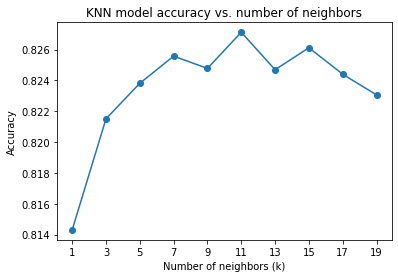

11
0.827121199430438


In [44]:
# Plot the relationship between k and accuracy
plt.plot(k_values, accuracies, 'o-')
# Set the x-axis ticks and labels to match the k values
plt.xticks(k_values)
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN model accuracy vs. number of neighbors')
plt.show()

print(k_values[5])
print(accuracies[5])
